In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import expenses.transactions

transactions_file = '/Users/brigaldies/Documents/Personal/Budget/transactions.xlsx'

days = 90
starting_balance = 6119.30

# Load the transactions
tx_df = expenses.transactions.load_transactions(transactions_file, starting_balance=starting_balance, days=days)

# Display the data frame
tx_df


Loading transactions from pathname /Users/brigaldies/Documents/Personal/Budget/transactions.xlsx...
Transactions count: 29
Starting balance  : 6119.3
Days in the future: 90
Date interval     : From 2018-09-16 11:45:21.648583 to 2018-12-15 11:45:21.648583


Starting balance: 6119.3
Min balance     : 474.47
Max balance     : 7615.69
Max average     : 2849.66


,item,item_type,amount,balance
date,,,,
2018-09-19,eCL transfer,credit,500.00,6619.3
2018-09-21,(OSC) Flight to Atlanta reimbursement,credit,996.39,7615.69
2018-09-21,Farm Bureau Umbrella annual fee,debit,325.00,7290.69
2018-09-21,Red Pump Kitchen downpayment,debit,1389.00,5901.69
2018-09-24,IRA Vanguard,debit,50.00,5851.69
2018-09-26,Jennifer’s ring,debit,126.00,5725.69
2018-09-26,Julien’s rent & groceries,debit,782.00,4943.69
2018-09-26,Lucie’s rent & groceries,debit,462.00,4481.69
2018-09-26,Prius,debit,269.51,4212.18


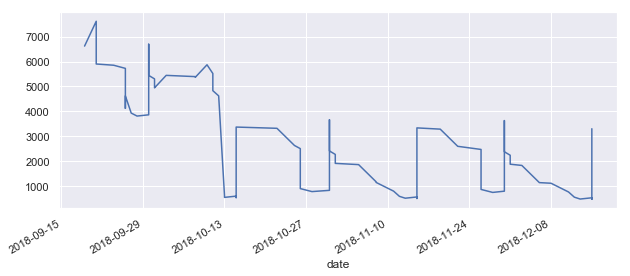

In [5]:
# Reset default params
sns.set()

# Set context
sns.set_context("notebook")

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,4))

# Extract the time series to plot
ts = tx_df.loc[:,'balance']
# ts[:5]

# Display a line chart over a time line
#plt.plot(ts[:], '-')
#_ = plt.xticks(rotation=45)

# ax = sns.lineplot(x='item', y='balance', data=tx_df)
# sns.tsplot(ts)
ts.plot(ax=ax)
